In [1]:
import numpy as np
import pandas as pd
from importer_snippets import load_experiment
from scipy.signal import find_peaks, savgol_filter
import matplotlib.pyplot as plt
plt.style.use('JGW')
import os
os.getcwd()

'C:\\Users\\jgage\\Documents\\GitHub\\CHEM274'

# Nyquist and Bode Plots

In [16]:
EIS = load_experiment()

In [17]:
def save_Nyq_fig(fig, analyte, electrode, solvent, notebook):
    ans = input('Save the figure?')
    if ans in ['y', 'yes', 'Yes', 'yeye', 'yeah', 'why, certainly', True]:
        fig.savefig("C:\\Users\\jgage\\Documents\GitHub\\CHEM274\\data\\figs\\Nyq_"+
            analyte + electrode + solvent + notebook+'.jpg')
        print('Saved')
    else:
        print('Not saved')

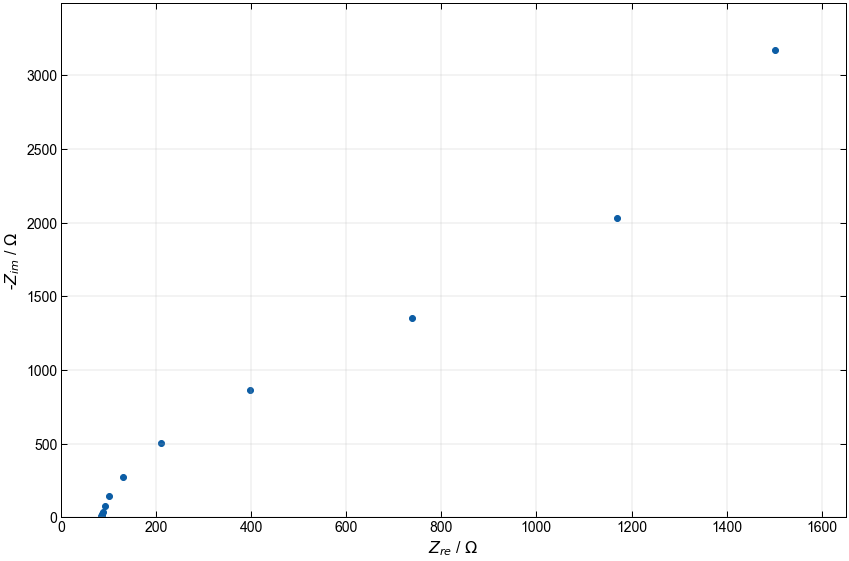

,parameter,value
0,E_DC,0.000000
1,E_AC,0.010000
2,low_freq,1.000000
3,Rm,1000.000000
4,Cm,0.000000
5,samp_rate,100000.000000
6,extra_samps,6000.000000
7,ai1_delay,0.000008


In [18]:
# Nyquist
fig = plt.figure()
ax = fig.add_subplot()

# ax.set_title('Nyquist Plot')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.scatter(EIS.data['Zre'], -EIS.data['Zim'], label = 'data')
ax.set_xlabel('$Z_{re}$ / $\Omega$')
ax.set_ylabel('-$Z_{im}$ / $\Omega$')
ax.set_xlim ([0,1.1*max(EIS.data['Zre'])])
ax.set_ylim ([0,1.1*max(-EIS.data['Zim'])])
fig.tight_layout()

analyte = 'Feacac_'
electrode = 'GC_'
solvent = 'MeCN_'
notebook = '_P-03-04'

plt.show()
# save_Nyq_fig(fig, analyte, electrode, solvent, notebook)
EIS.params

In [ ]:
# Bode
Z_mag = np.sqrt(EIS.data['Zre']**2 * EIS.data['Zim']**2)
log_Z_mag = np.log10(Z_mag)
phi = np.arctan(EIS.data['Zim'] / EIS.data['Zre']) * 180 / np.pi # phase angle in degrees
log_omega = np.log10(EIS.data['f'])


fig = plt.figure()
ax = fig.add_subplot()

# ax.set_title('Bode Plot')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
ax.scatter(log_omega, log_Z_mag, label = 'Impedance')
ax.set_ylabel('log$|Z|$', color='C0')
ax.set_xlabel('log$\omega$')

ax2 = ax.twinx()
ax2.scatter(log_omega, phi, label = 'Phase', color='C1')
ax2.set_ylabel('$\phi$ / degrees', color='C1')
plt.grid()
fig.tight_layout()

# Cyclic Voltammograms

In [14]:
CV = load_experiment()

FileNotFoundError: [WinError 3] The system cannot find the path specified: ''

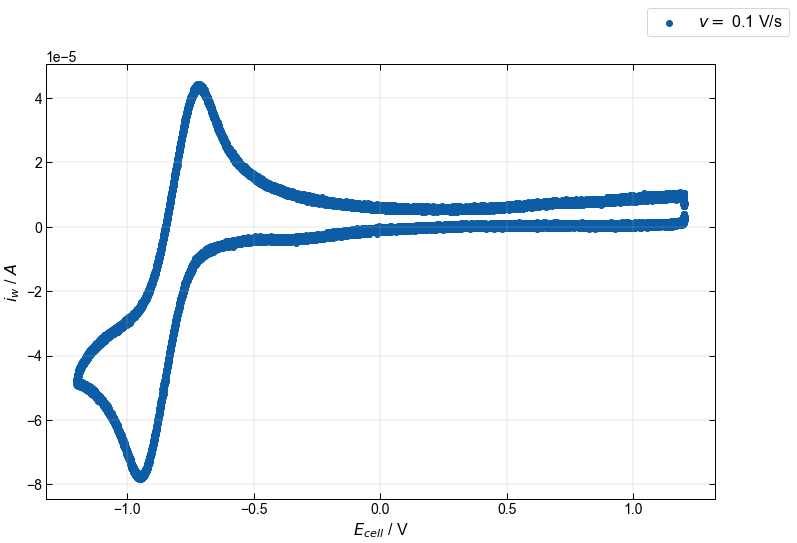

In [3]:
# CV
fig = plt.figure()
ax = fig.add_subplot()

# ax.set_title('Cyclic Voltammogram')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.scatter(CV.data['Ecell'], CV.data['iw'], label = '$v=$ '+str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + ' V/s')
ax.set_xlabel('$E_{cell}$ / V')
ax.set_ylabel('$i_{w}$ / $A$')

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.style.use('JGW')
fig.legend()

### Find CV Peaks

In [12]:
# Smooth data using the Savitski Golay method
smooth_iw = savgol_filter(CV.data['iw'], 25, 2)
# Check the result
# plt.plot(CV.data['Ecell'], smooth_iw, zorder=1, color='r')
# plt.plot(CV.data['Ecell'], CV.data['iw'], label = '$v=$ '+str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + ' V/s', zorder=0)
# plt.xlim(-.75, -.74)
# plt.ylim(.00003, .00004)

# Maxima
find_ipa = find_peaks(smooth_iw, height=0, width=3600) # Must give minimum height to get peak_heights dict.
ipa, Epa = CV.data['iw'][find_ipa[0]].to_numpy(), CV.data['Ecell'][find_ipa[0]].to_numpy()

# Invert signal to find minima - Signals are negative but indicies are correct!
find_ipc = find_peaks(-smooth_iw, height=0, width=3600) # Remember to un-invert anytime if calling ipc values from find_ipc, but not indicies.
ipc, Epc = CV.data['iw'][find_ipc[0]].to_numpy(), CV.data['Ecell'][find_ipc[0]].to_numpy()

peaks = {'ipa': ipa, 'Epa': Epa, 'ipc': ipc, 'Epc': Epc}
peaks

{'ipa': array([1.02784488e-04, 2.28558978e-05]),
 'Epa': array([-0.53072339,  0.79648615]),
 'ipc': array([-1.76017803e-05, -4.75793072e-04]),
 'Epc': array([ 0.19290974, -0.93201063])}

#### Peak picking and figure saving

In [9]:
def save_CV_fig(fig, analyte, electrode, solvent, notebook):
    ans = input('Save the figure?')
    if ans in ['y', 'yes', 'Yes', 'yeye', 'yeah', 'why, certainly', True]:
        fig.savefig("C:\\Users\\jgage\\Documents\GitHub\\CHEM274\\data\\figs\\CV_"+
            analyte + electrode + solvent +
            str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + 'Vs-1_'+
                notebook+'.jpg')
        print('Saved')
    else:
        print('Not saved')

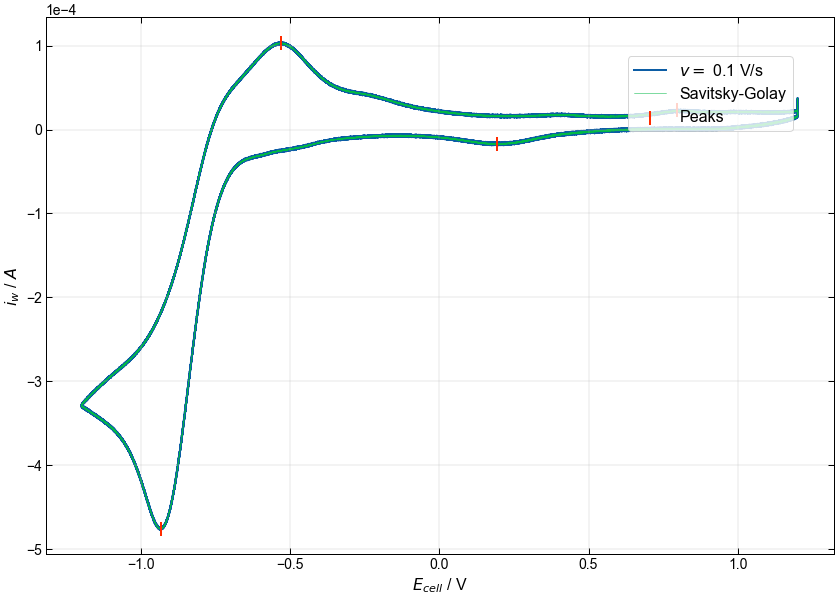

Save the figure? y


Saved


In [13]:
# Draw same plot as above, but with peaks
fig = plt.figure()
ax = fig.add_subplot()

ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
ax.plot(CV.data['Ecell'], CV.data['iw'], label = '$v=$ '+str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + ' V/s', zorder=0)
ax.plot(CV.data['Ecell'], smooth_iw, color='C2', label='Savitsky-Golay', lw=.5, zorder=.5)
ax.scatter([*Epa, *Epc], [*ipa, *ipc], color='C1', label='Peaks', marker='|', s=200, zorder=1)
fig.tight_layout()

# ax.set_title('Cyclic Voltammogram')
ax.set_xlabel('$E_{cell}$ / V')
ax.set_ylabel('$i_{w}$ / $A$')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.legend(loc=(0.75, 0.78))

analyte = 'TBAF_'
electrode = 'Au_'
solvent = 'MeCN_'
notebook = '_P-04-6'

plt.show()
save_CV_fig(fig, analyte, electrode, solvent, notebook)

##### 